In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("diabetic_data.csv")

df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [2]:
df.shape

(101766, 50)

In [3]:
df.dtypes

,0
encounter_id,int64
patient_nbr,int64
race,object
gender,object
age,object
weight,object
admission_type_id,int64
discharge_disposition_id,int64
admission_source_id,int64
time_in_hospital,int64


In [4]:
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [5]:
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

gender 3


In [6]:
df = df.drop(['weight','payer_code','medical_specialty', 'citoglipton', 'examide'], axis = 1)

As the data shows, the weight variable contains a lot of missing data, so there is no real point in imputing this variable, so we are going to drop this variable altogether. The payer_code and medical_specialty variables contain about 40% of missing values, so we are also excluding these variables.

variables (drugs named citoglipton and examide), all records have the same value so we are also excluding these variables.

In [7]:
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

race 2273
gender 0
age 0
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0
gender 3


In [8]:
drop_Idx = set(df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')].index)

drop_Idx = drop_Idx.union(set(df['diag_1'][df['diag_1'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_2'][df['diag_2'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_3'][df['diag_3'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['race'][df['race'] == '?'].index))
drop_Idx = drop_Idx.union(set(df[df['discharge_disposition_id'] == 11].index))
drop_Idx = drop_Idx.union(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))
new_Idx = list(set(df.index) - set(drop_Idx))
df = df.iloc[new_Idx]

In [9]:
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

Service utilization measures how often a patient has used hospital or clinic services in the past year. We combined three variables—inpatient admissions, emergency room visits, and outpatient visits—into a single feature.

In [11]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]

df['numchange'].value_counts()

,count
numchange,
0,70142
1,24922
2,1271
3,106
4,5


In [12]:
print(df['admission_type_id'])

1         1
2         1
3         1
4         1
5         2
         ..
101761    1
101762    1
101763    1
101764    2
101765    1
Name: admission_type_id, Length: 96446, dtype: int64


In [13]:
df['admission_type_id'] = df['admission_type_id'].replace(2,1)
df['admission_type_id'] = df['admission_type_id'].replace(7,1)
df['admission_type_id'] = df['admission_type_id'].replace(6,5)
df['admission_type_id'] = df['admission_type_id'].replace(8,5)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(9,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(13,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(14,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(24,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(12,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(15,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(16,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(17,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25,18)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(26,18)

df['admission_source_id'] = df['admission_source_id'].replace(2,1)
df['admission_source_id'] = df['admission_source_id'].replace(3,1)
df['admission_source_id'] = df['admission_source_id'].replace(5,4)
df['admission_source_id'] = df['admission_source_id'].replace(6,4)
df['admission_source_id'] = df['admission_source_id'].replace(10,4)
df['admission_source_id'] = df['admission_source_id'].replace(22,4)
df['admission_source_id'] = df['admission_source_id'].replace(25,4)
df['admission_source_id'] = df['admission_source_id'].replace(15,9)
df['admission_source_id'] = df['admission_source_id'].replace(17,9)
df['admission_source_id'] = df['admission_source_id'].replace(20,9)
df['admission_source_id'] = df['admission_source_id'].replace(21,9)
df['admission_source_id'] = df['admission_source_id'].replace(13,11)
df['admission_source_id'] = df['admission_source_id'].replace(14,11)




In [14]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)

for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)

<ipython-input-14-800ef9f3acf9>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['change'] = df['change'].replace('No', 0)
<ipython-input-14-800ef9f3acf9>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace('Female', 0)
<ipython-input-14-800ef9f3acf9>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.

In [15]:
df['A1Cresult'] = df['A1Cresult'].replace('>7', 1)
df['A1Cresult'] = df['A1Cresult'].replace('>8', 1)
df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
df['A1Cresult'] = df['A1Cresult'].replace('None', -99)
df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', -99)

<ipython-input-15-a93b7ed3ed2c>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
<ipython-input-15-a93b7ed3ed2c>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)


In [16]:
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
df['age'].value_counts()

<ipython-input-16-4694c4241c95>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)


,count
age,
8,24815
7,21521
6,16546
9,16223
5,9208
4,3538
10,2594
3,1471
2,466


In [17]:
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape
(70442, 55)

(70442, 55)

In [18]:
df.head().T

,1,2,3,4,5
encounter_id,149190,64410,500364,16680,35754
patient_nbr,55629189,86047875,82442376,42519267,82637451
race,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,0,0,1,1,1
age,2,3,4,5,6
admission_type_id,1,1,1,1,1
discharge_disposition_id,1,1,1,1,1
admission_source_id,7,7,7,7,1
time_in_hospital,3,2,2,1,3
num_lab_procedures,59,11,44,51,31


In [19]:
df['readmitted'].value_counts()

,count
readmitted,
NO,50731
>30,34649
<30,11066


In [20]:
df['readmitted'] = df['readmitted'].replace('>30', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)

<ipython-input-20-69ebdb50a4a9>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['readmitted'] = df['readmitted'].replace('NO', 0)


In [21]:
df['level1_diag1'] = df['diag_1']
df['level2_diag1'] = df['diag_1']
df['level1_diag2'] = df['diag_2']
df['level2_diag2'] = df['diag_2']
df['level1_diag3'] = df['diag_3']
df['level2_diag3'] = df['diag_3']

df.loc[df['diag_1'].str.contains('V'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_1'].str.contains('E'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_2'].str.contains('V'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_2'].str.contains('E'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_3'].str.contains('V'), ['level1_diag3', 'level2_diag3']] = 0
df.loc[df['diag_3'].str.contains('E'), ['level1_diag3', 'level2_diag3']] = 0
df['level1_diag1'] = df['level1_diag1'].replace('?', -1)
df['level2_diag1'] = df['level2_diag1'].replace('?', -1)
df['level1_diag2'] = df['level1_diag2'].replace('?', -1)
df['level2_diag2'] = df['level2_diag2'].replace('?', -1)
df['level1_diag3'] = df['level1_diag3'].replace('?', -1)
df['level2_diag3'] = df['level2_diag3'].replace('?', -1)

df['level1_diag1'] = df['level1_diag1'].astype(float)
df['level2_diag1'] = df['level2_diag1'].astype(float)
df['level1_diag2'] = df['level1_diag2'].astype(float)
df['level2_diag2'] = df['level2_diag2'].astype(float)
df['level1_diag3'] = df['level1_diag3'].astype(float)
df['level2_diag3'] = df['level2_diag3'].astype(float)

In [22]:
def categorize_diagnosis(value):
    if (390 <= value < 460) or (np.floor(value) == 785):
        return 1
    elif (460 <= value < 520) or (np.floor(value) == 786):
        return 2
    elif (520 <= value < 580) or (np.floor(value) == 787):
        return 3
    elif np.floor(value) == 250:
        return 4
    elif 800 <= value < 1000:
        return 5
    elif 710 <= value < 740:
        return 6
    elif (580 <= value < 630) or (np.floor(value) == 788):
        return 7
    elif 140 <= value < 240:
        return 8
    else:
        return 0

df['level1_diag1'] = df['level1_diag1'].apply(categorize_diagnosis)
df['level1_diag2'] = df['level1_diag2'].apply(categorize_diagnosis)
df['level1_diag3'] = df['level1_diag3'].apply(categorize_diagnosis)

def categorize_level2_diagnosis(value):
    if 390 <= value < 399:
        return 1
    elif 401 <= value < 415:
        return 2
    elif 415 <= value < 460:
        return 3
    elif np.floor(value) == 785:
        return 4
    elif 460 <= value < 489:
        return 5
    elif 490 <= value < 497:
        return 6
    elif 500 <= value < 520:
        return 7
    elif np.floor(value) == 786:
        return 8
    elif 520 <= value < 530:
        return 9
    elif 530 <= value < 544:
        return 10
    elif 550 <= value < 554:
        return 11
    elif 555 <= value < 580:
        return 12
    elif np.floor(value) == 787:
        return 13
    elif np.floor(value) == 250:
        return 14
    elif 800 <= value < 1000:
        return 15
    elif 710 <= value < 740:
        return 16
    elif 580 <= value < 630:
        return 17
    elif np.floor(value) == 788:
        return 18
    elif 140 <= value < 240:
        return 19
    elif 240 <= value < 280 and np.floor(value) != 250:
        return 20
    elif (680 <= value < 710) or (np.floor(value) == 782):
        return 21
    elif 290 <= value < 320:
        return 22
    else:
        return 0

df['level2_diag1'] = df['level2_diag1'].apply(categorize_level2_diagnosis)
df['level2_diag2'] = df['level2_diag2'].apply(categorize_level2_diagnosis)
df['level2_diag3'] = df['level2_diag3'].apply(categorize_level2_diagnosis)

<ipython-input-23-13feb082618e>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
<ipython-input-23-13feb082618e>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')


Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

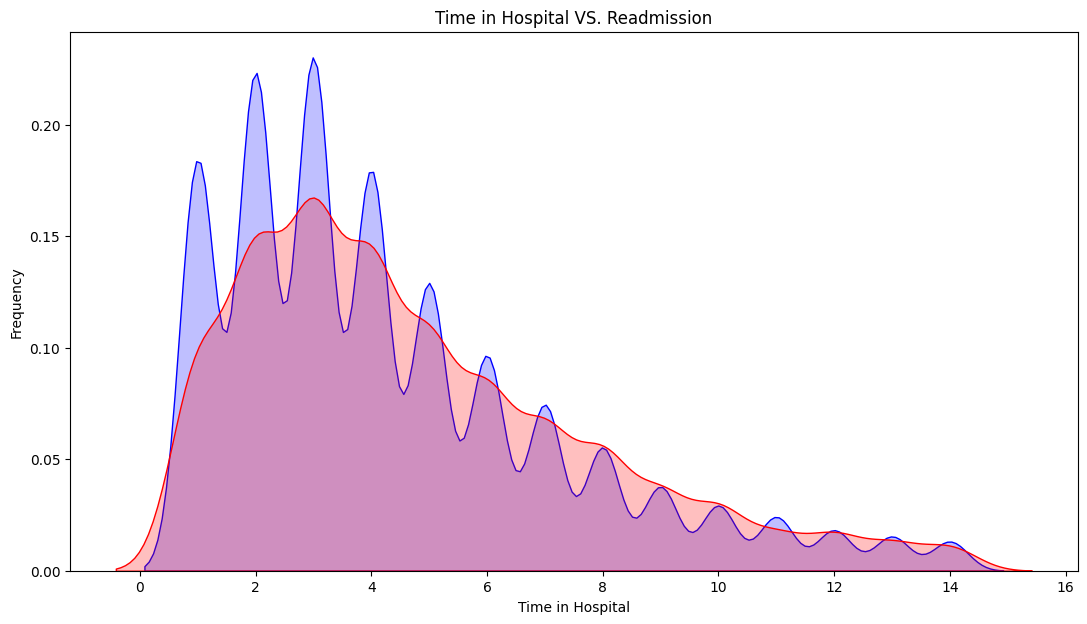

In [23]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

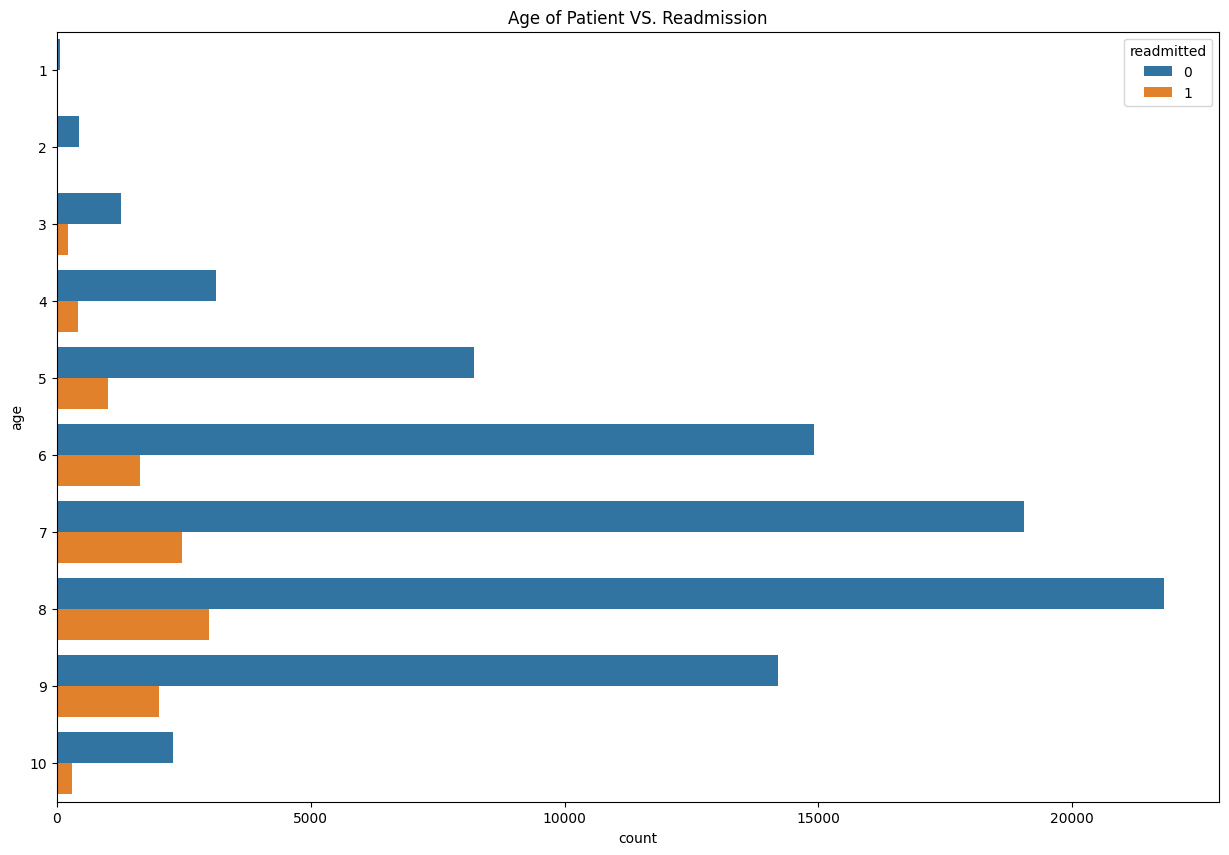

In [24]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

<Axes: xlabel='count', ylabel='race'>

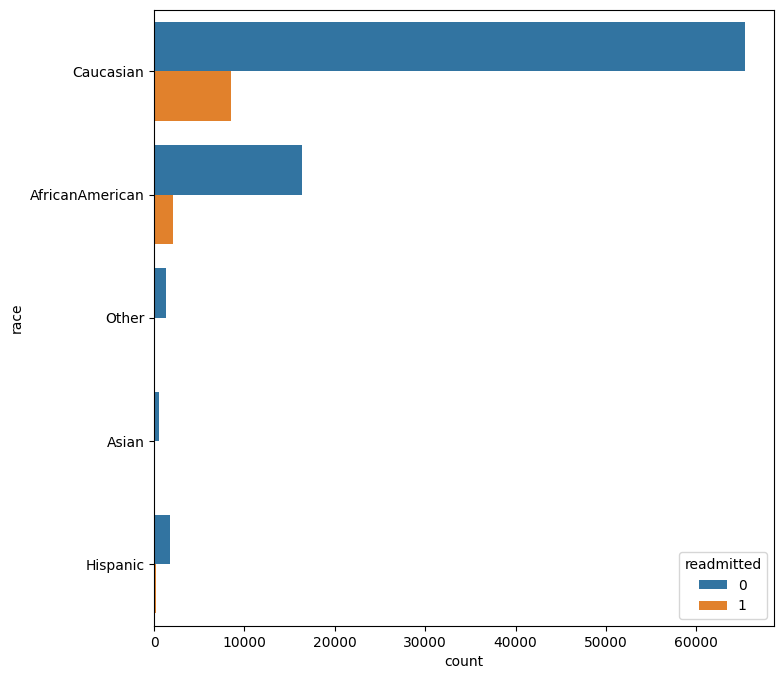

In [25]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['race'], hue = df['readmitted'])

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

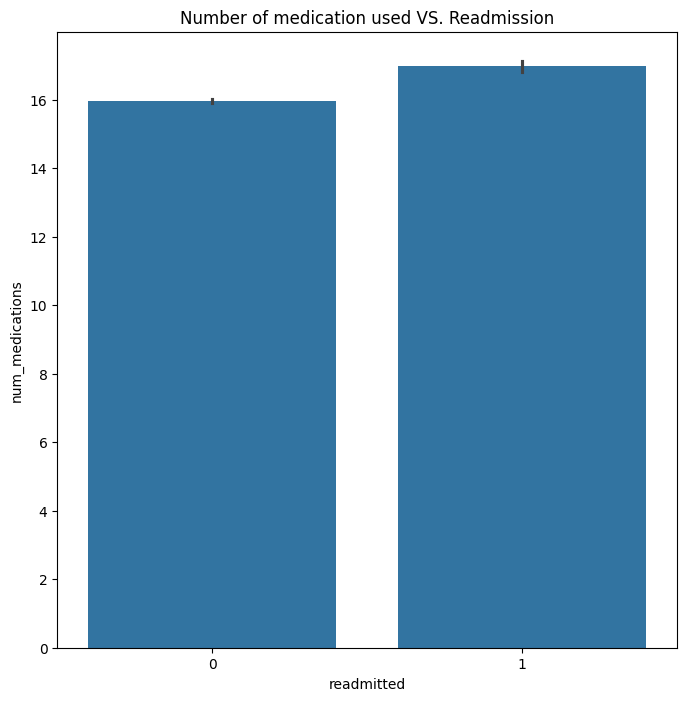

In [26]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df['readmitted'], y = df['num_medications']).set_title("Number of medication used VS. Readmission")

#MALE 1 FEMALE 0

Text(0.5, 1.0, 'Service Utilization VS. Readmission')

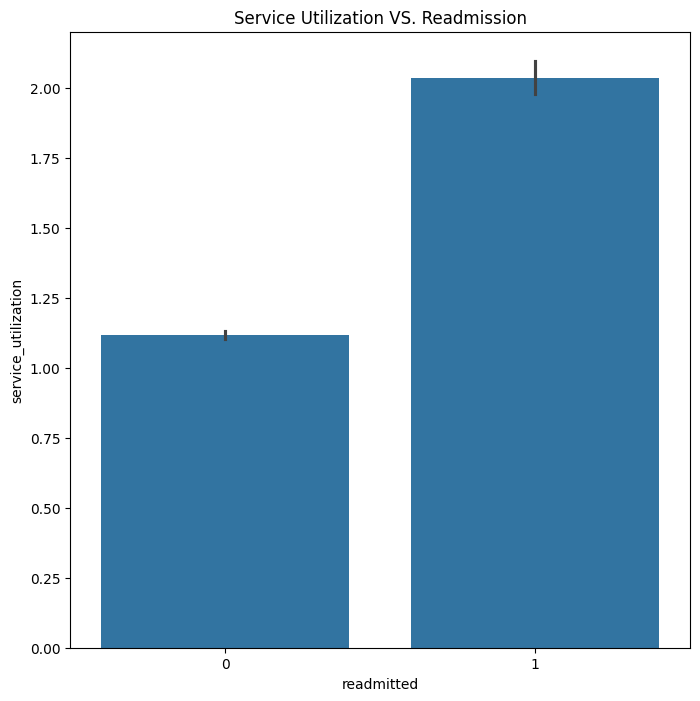

In [27]:
fig = plt.figure(figsize=(8,8))
sns.barplot( y = df['service_utilization'], x = df['readmitted']).set_title('Service Utilization VS. Readmission')

Text(0.5, 1.0, 'Glucose test serum test result VS. Readmission')

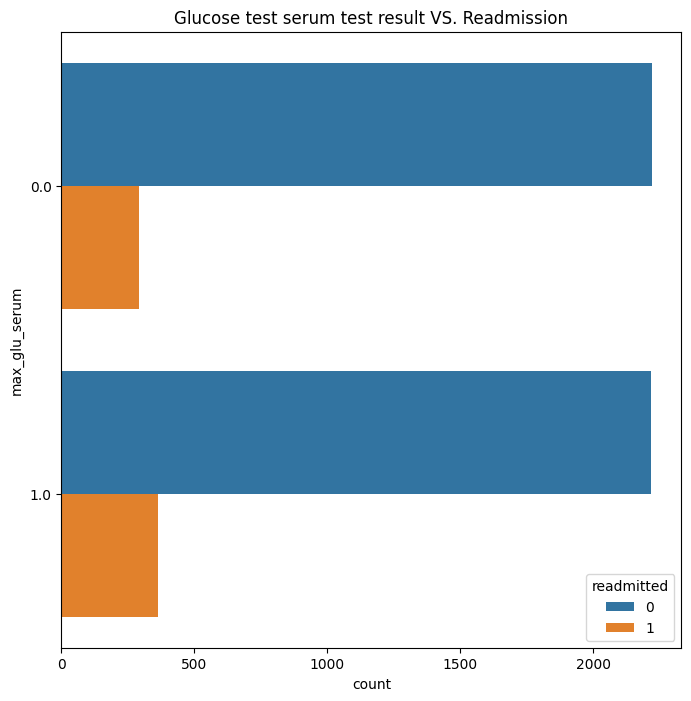

In [28]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['max_glu_serum'], hue = df['readmitted']).set_title('Glucose test serum test result VS. Readmission')

<ipython-input-29-217a4e5fe706>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
<ipython-input-29-217a4e5fe706>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')


Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

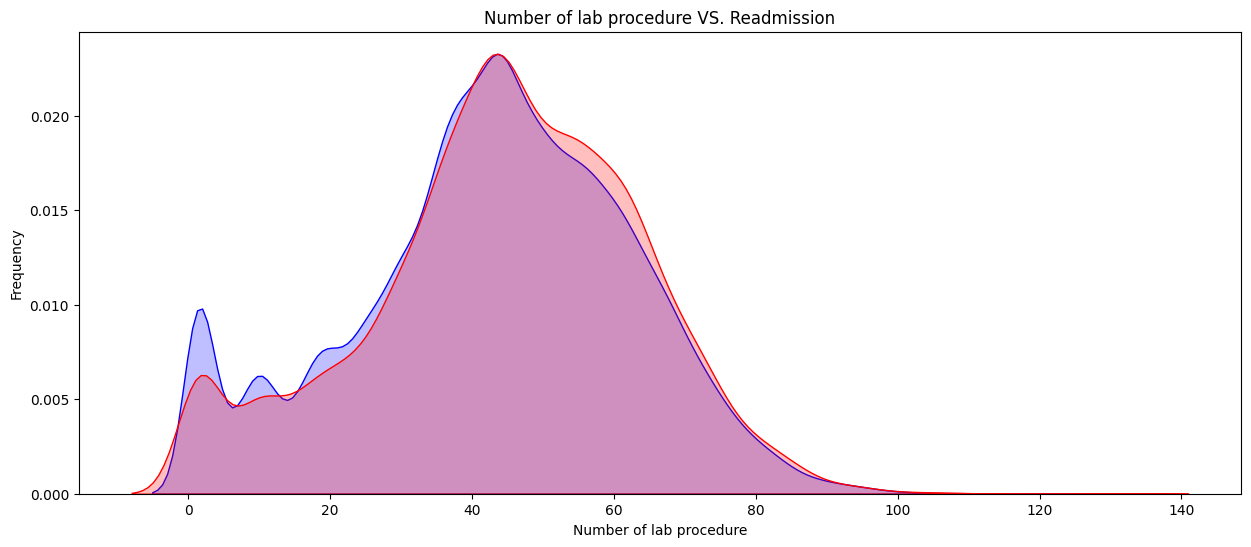

In [29]:
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

In [30]:
df['age'] = df['age'].astype('int64')
print(df.age.value_counts())
# convert age categories to mid-point values
age_dict = {1:5, 2:15, 3:25, 4:35, 5:45, 6:55, 7:65, 8:75, 9:85, 10:95}
df['age'] = df.age.map(age_dict)
df.age.value_counts()

age
8     24815
7     21521
6     16546
9     16223
5      9208
4      3538
10     2594
3      1471
2       466
1        64
Name: count, dtype: int64


,count
age,
75,24815
65,21521
55,16546
85,16223
45,9208
35,3538
95,2594
25,1471
15,466


In [31]:
i = ['encounter_id', 'patient_nbr', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
     'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
     'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
     'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
     'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed',
     'age', 'A1Cresult', 'max_glu_serum', 'level1_diag1', 'level1_diag2', 'level1_diag3',
     'level2_diag1', 'level2_diag2', 'level2_diag3']

df[i] = df[i].astype('object')

In [32]:
df['nummed'] = 0

for col in keys:
    df['nummed'] = df['nummed'] + df[col]
df['nummed'].value_counts()

,count
nummed,
1,44589
0,22156
2,20901
3,7448
4,1290
5,57
6,5


In [33]:
num_col = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
num_col

['num_lab_procedures',
 'num_procedures',
 'number_inpatient',
 'number_emergency',
 'time_in_hospital',
 'num_medications',
 'number_outpatient',
 'number_diagnoses',
 'numchange',
 'service_utilization']

In [34]:
# Removing skewnewss and kurtosis using log transformation if it is above a threshold value -  2

statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = df[i].skew()
    skew_before.append(skewval)

    kurtval = df[i].kurtosis()
    kurt_before.append(kurtval)

    sdval = df[i].std()
    standard_deviation_before.append(sdval)

    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')

        if len(df[df[i] == 0])/len(df) <=0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)

            kurtvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)

            sdvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)

        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)

            kurtvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)

            sdvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)

    else:
        log_type.append('NA')
        log_transform_needed.append('No')

        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

In [35]:
statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,num_lab_procedures,-0.240626,-0.253275,19.656782,No,NA,-0.240626,-0.253275,19.656782
1,num_procedures,1.313236,0.856100,1.703183,No,NA,1.313236,0.856100,1.703183
2,number_inpatient,3.566269,20.044813,1.269975,Yes,log1p,1.425127,1.319186,0.513389
3,number_emergency,22.695921,1165.140400,0.948089,Yes,log1p,3.614471,15.854105,0.318742
4,time_in_hospital,1.127510,0.839050,2.982330,No,NA,1.127510,0.839050,2.982330
5,num_medications,1.339187,3.549325,8.072516,No,NA,1.339187,3.549325,8.072516
6,number_outpatient,8.767489,146.244961,1.280061,Yes,log1p,2.708627,7.648535,0.432949
7,number_diagnoses,-0.807741,-0.372558,1.836659,No,NA,-0.807741,-0.372558,1.836659
8,numchange,1.426548,1.451898,0.488614,No,NA,1.426548,1.451898,0.488614
9,service_utilization,5.312374,67.194018,2.315789,Yes,log1p,1.097244,0.497241,0.665656


In [36]:
df = df.drop(['number_outpatient', 'number_inpatient', 'number_emergency','service_utilization'], axis = 1)
df.shape

(96446, 50)

In [37]:
numerics = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
numerics

['num_lab_procedures',
 'num_procedures',
 'time_in_hospital',
 'num_medications',
 'number_diagnoses',
 'numchange']

In [38]:
df.encounter_id = df.encounter_id.astype('int64')
df.patient_nbr = df.patient_nbr.astype('int64')
df.diabetesMed = df.diabetesMed.astype('int64')
df.change = df.change.astype('int64')

# convert data type of nominal features in dataframe to 'object' type for aggregating
i = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
     'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
     'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
     'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'A1Cresult']

# Fill NaN values with -1 and convert to int64
df[i] = df[i].fillna(-1).astype('int64')

df.dtypes

<ipython-input-38-9dfee48eadd2>:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i] = df[i].fillna(-1).astype('int64')


,0
encounter_id,int64
patient_nbr,int64
race,object
gender,object
age,object
admission_type_id,object
discharge_disposition_id,object
admission_source_id,object
time_in_hospital,int64
num_lab_procedures,int64


In [39]:
dfcopy = df.copy(deep = True)

In [40]:
df['readmitted'] = df['readmitted'].apply(lambda x: 0 if x == 2 else x)

In [41]:
df.drop(['diag_1', 'diag_2', 'diag_3', 'level2_diag1', 'level1_diag2', 'level2_diag2', 'level1_diag3',
         'level2_diag3'], axis=1, inplace=True)

In [42]:
interactionterms = [('num_medications','time_in_hospital'),
('num_medications','num_procedures'),
('time_in_hospital','num_lab_procedures'),
('num_medications','num_lab_procedures'),
('num_medications','number_diagnoses'),
('age','number_diagnoses'),
('change','num_medications'),
('number_diagnoses','time_in_hospital'),
('num_medications','numchange')]

In [43]:
for inter in interactionterms:
    name = inter[0] + '|' + inter[1]
    df[name] = df[inter[0]] * df[inter[1]]

In [44]:
df[['num_medications','time_in_hospital', 'num_medications|time_in_hospital']].head()

,num_medications,time_in_hospital,num_medications|time_in_hospital
1,18,3,54
2,13,2,26
3,16,2,32
4,8,1,8
5,16,3,48


In [45]:
datf = pd.DataFrame()
datf['features'] = numerics
datf['std_dev'] = datf['features'].apply(lambda x: df[x].std())
datf['mean'] = datf['features'].apply(lambda x: df[x].mean())

In [46]:
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape

(67580, 51)

In [47]:
import scipy as sp


def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

df2[numerics] = standardize(df2[numerics])
df2 = df2[(np.abs(sp.stats.zscore(df2[numerics])) < 3).all(axis=1)]

<ipython-input-47-b2a31b51c462>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[numerics] = standardize(df2[numerics])


In [48]:
numeric_columns = df2.select_dtypes(include=['int64', 'float64']).columns
df2_numeric = df2[numeric_columns].drop(['patient_nbr', 'encounter_id'], axis=1, errors='ignore')

# Calculate correlation
from matplotlib.colors import ListedColormap
my_cmap = ListedColormap(sns.light_palette((250, 100, 50), input="husl", n_colors=50).as_hex())
table = df2_numeric.corr(method='pearson')
table.style.background_gradient(cmap=my_cmap, axis=0)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,numchange,num_medications|time_in_hospital,num_medications|num_procedures,time_in_hospital|num_lab_procedures,num_medications|num_lab_procedures,num_medications|number_diagnoses,change|num_medications,number_diagnoses|time_in_hospital,num_medications|numchange
time_in_hospital,1.000000,0.315961,0.145145,0.440391,0.220522,0.064338,-0.014719,0.029512,0.006042,0.000536,0.009705,nan,0.014199,0.022450,0.003482,-0.004103,0.000194,0.001117,-0.002206,0.005407,-0.006493,0.096013,-0.000389,0.002169,nan,nan,0.002648,0.093100,0.058606,0.054171,0.136509,0.860489,0.269698,0.852598,0.498127,0.454395,0.228759,0.940111,0.226524
num_lab_procedures,0.315961,1.000000,0.012309,0.230991,0.144827,0.259251,-0.053632,0.003012,-0.008245,-0.002949,-0.007994,nan,0.018888,0.001573,-0.000503,-0.017859,-0.007419,-0.001843,-0.003670,0.004875,-0.001222,0.095112,-0.014267,-0.003751,nan,nan,-0.003849,0.060712,0.035554,0.029649,0.105516,0.325369,0.111574,0.672588,0.735503,0.261076,0.131443,0.321006,0.150154
num_procedures,0.145145,0.012309,1.000000,0.331670,0.057352,-0.025970,-0.056600,0.004121,-0.003688,0.005257,0.004870,nan,0.003304,0.002726,-0.000597,0.012113,0.008738,-0.001392,0.001124,-0.005476,-0.000086,0.000758,-0.006545,-0.003160,nan,nan,-0.000867,-0.016047,-0.019460,0.000312,-0.009601,0.262500,0.879309,0.137814,0.240011,0.289038,0.108280,0.153226,0.075361
num_medications,0.440391,0.230991,0.331670,1.000000,0.248233,0.015357,0.074392,0.026294,0.028208,0.001191,0.042234,nan,0.057665,0.040970,0.003565,0.072900,0.059207,0.014856,0.002739,0.004008,-0.001756,0.192648,0.009161,0.003971,nan,nan,0.002681,0.232714,0.189418,0.039492,0.193023,0.751374,0.594402,0.439663,0.770475,0.900057,0.529171,0.460659,0.391765
number_diagnoses,0.220522,0.144827,0.057352,0.248233,1.000000,-0.006320,-0.072608,0.030401,0.015493,-0.015741,0.011788,nan,-0.010917,-0.023518,0.000031,0.005629,-0.008020,0.006483,-0.001527,0.004885,-0.010530,0.088467,-0.002398,0.001443,nan,nan,-0.006872,0.041725,0.023590,0.041476,0.063786,0.242687,0.108829,0.219367,0.254301,0.598547,0.123162,0.479031,0.118105
A1Cresult,0.064338,0.259251,-0.025970,0.015357,-0.006320,1.000000,0.044602,0.017310,-0.000007,-0.002458,0.019893,nan,0.013855,0.009963,-0.001129,-0.000866,0.010107,0.002067,-0.001129,-0.003008,-0.001187,0.104690,0.000623,0.004201,nan,nan,-0.001737,0.107541,0.085089,-0.008992,0.121055,0.054864,0.002815,0.164817,0.167657,0.021821,0.088929,0.050155,0.106683
metformin,-0.014719,-0.053632,-0.056600,0.074392,-0.072608,0.044602,1.000000,0.002367,0.014900,-0.011255,0.037528,nan,0.074506,0.137829,-0.007971,0.054376,0.092803,0.007922,0.011444,-0.003451,-0.001014,-0.031688,-0.025296,-0.001603,nan,nan,0.007714,0.346196,0.291122,-0.012811,0.013390,0.013706,-0.013796,-0.038368,0.002786,0.025701,0.293734,-0.035784,0.020075
repaglinide,0.029512,0.003012,0.004121,0.026294,0.030401,0.017310,0.002367,1.000000,0.000201,-0.003602,-0.007191,nan,-0.019748,-0.024006,-0.001786,0.016279,0.016958,0.020761,0.024371,-0.000773,-0.002321,0.005547,-0.004523,-0.001181,nan,nan,-0.000446,0.073862,0.065232,0.014226,0.027769,0.030286,0.009525,0.022254,0.020408,0.035326,0.067438,0.037378,0.027839
nateglinide,0.006042,-0.008245,-0.003688,0.028208,0.015493,-0.000007,0.014900,0.000201,1.000000,-0.002666,0.007950,nan,-0.017056,-0.021499,-0.001322,0.028480,0.016390,0.002813,0.010390,-0.000572,-0.001718,0.000380,-0.002578,-0.000874,nan,nan,-0.000330,0.056634,0.048282,-0.004119,0.003257,0.013969,0.003070,-0.001159,0.011480,0.028555,0.055297,0.011037,0.005964
chlorpropamide,0.000536,-0.002949,0.005257,0.001191,-0.015741,-0.002458,-0

In [49]:
df2['level1_diag1'] = df2['level1_diag1'].astype('object')
df_pd = pd.get_dummies(df2, columns=['gender', 'admission_type_id', 'discharge_disposition_id',
                                      'admission_source_id', 'max_glu_serum', 'A1Cresult', 'level1_diag1'], drop_first = True)
just_dummies = pd.get_dummies(df_pd['race'])
df_pd = pd.concat([df_pd, just_dummies], axis=1)
df_pd.drop(['race'], inplace=True, axis=1)

non_num_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
                'max_glu_serum', 'A1Cresult', 'level1_diag1' ]

In [50]:
num_cols = list(set(list(df._get_numeric_data().columns))- {'readmitted', 'change'})
num_cols

['A1Cresult',
 'num_lab_procedures',
 'encounter_id',
 'tolbutamide',
 'metformin-rosiglitazone',
 'glipizide',
 'num_medications|num_lab_procedures',
 'num_medications|numchange',
 'repaglinide',
 'miglitol',
 'diabetesMed',
 'acetohexamide',
 'metformin-pioglitazone',
 'tolazamide',
 'number_diagnoses|time_in_hospital',
 'num_procedures',
 'num_medications|number_diagnoses',
 'insulin',
 'time_in_hospital',
 'glimepiride-pioglitazone',
 'rosiglitazone',
 'numchange',
 'acarbose',
 'glimepiride',
 'num_medications|time_in_hospital',
 'number_diagnoses',
 'nateglinide',
 'change|num_medications',
 'glyburide-metformin',
 'num_medications|num_procedures',
 'patient_nbr',
 'time_in_hospital|num_lab_procedures',
 'num_medications',
 'metformin',
 'glyburide',
 'glipizide-metformin',
 'troglitazone',
 'pioglitazone',
 'chlorpropamide']

In [51]:
new_non_num_cols = []
for i in non_num_cols:
    for j in df_pd.columns:
        if i in j:
            new_non_num_cols.append(j)

new_non_num_cols

['gender_1',
 'admission_type_id_3',
 'admission_type_id_4',
 'admission_type_id_5',
 'discharge_disposition_id_2',
 'discharge_disposition_id_7',
 'discharge_disposition_id_10',
 'discharge_disposition_id_18',
 'discharge_disposition_id_19',
 'discharge_disposition_id_20',
 'discharge_disposition_id_27',
 'discharge_disposition_id_28',
 'admission_source_id_4',
 'admission_source_id_7',
 'admission_source_id_8',
 'admission_source_id_9',
 'admission_source_id_11',
 'max_glu_serum_1.0',
 'A1Cresult_0',
 'A1Cresult_1',
 'level1_diag1_1',
 'level1_diag1_2',
 'level1_diag1_3',
 'level1_diag1_4',
 'level1_diag1_5',
 'level1_diag1_6',
 'level1_diag1_7',
 'level1_diag1_8']

In [52]:
df_pd.head().T

,1,2,3,4,5
encounter_id,149190,64410,500364,16680,35754
patient_nbr,55629189,86047875,82442376,42519267,82637451
age,15,25,35,45,55
time_in_hospital,-0.444872,-0.784109,-0.784109,-1.123345,-0.444872
num_lab_procedures,0.803605,-1.60206,0.051835,0.402661,-0.5997
...,...,...,...,...,...
AfricanAmerican,False,True,False,False,False
Asian,False,False,False,False,False
Caucasian,True,False,True,True,True
Hispanic,False,False,False,False,False


In [53]:
print("Available columns:", df_pd.columns.tolist())

# Then, update the feature set to only include available columns
feature_set = [
    'age', 'time_in_hospital', 'num_procedures', 'num_medications',
    'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide',
    'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
    'pioglitazone', 'rosiglitazone', 'acarbose', 'tolazamide',
    'insulin', 'glyburide-metformin',
    'AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other',
    'gender_1', 'admission_type_id_3', 'admission_type_id_5',
    'discharge_disposition_id_2', 'discharge_disposition_id_7',
    'discharge_disposition_id_10', 'discharge_disposition_id_18',
    'admission_source_id_4', 'admission_source_id_7', 'admission_source_id_9',
    'num_medications|time_in_hospital', 'num_medications|num_procedures',
    'time_in_hospital|num_lab_procedures', 'num_medications|num_lab_procedures',
    'num_medications|number_diagnoses', 'age|number_diagnoses',
    'change|num_medications', 'number_diagnoses|time_in_hospital',
    'num_medications|numchange'
]

# Remove any features that don't exist in df_pd
feature_set = [f for f in feature_set if f in df_pd.columns]

# Now create X and y
X = df_pd[feature_set]
y = df_pd['readmitted']

Available columns: ['encounter_id', 'patient_nbr', 'age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted', 'numchange', 'nummed', 'num_medications|time_in_hospital', 'num_medications|num_procedures', 'time_in_hospital|num_lab_procedures', 'num_medications|num_lab_procedures', 'num_medications|number_diagnoses', 'age|number_diagnoses', 'change|num_medications', 'number_diagnoses|time_in_hospital', 'num_medications|numchange', 'gender_1', 'admission_type_id_3', 'admission_type_id_4', 'admission_type_id_5', 'discharge_disposition_id_2', 'discharge_d

In [55]:
df_pd['readmitted'].value_counts()

,count
readmitted,
0,59187
1,5872


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Use 'liblinear' solver for L1 regularization
logit = LogisticRegression(
    fit_intercept=True,
    penalty='l1',
    solver='liblinear',  # or 'saga'
    random_state=0
)

logit.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [57]:
logit_pred = logit.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,0,All
Actual,,
0,1653,1653
1,173,173
All,1826,1826


In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy_logit = accuracy_score(y_test, logit_pred)
precision_logit = precision_score(y_test, logit_pred)
recall_logit = recall_score(y_test, logit_pred)


# Print metrics with four decimal places
print("Accuracy is {0:.4f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.4f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.4f}".format(recall_score(y_test, logit_pred)))


Accuracy is 0.9111
Precision is 0.0000
Recall is 0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [61]:
!pip install -U imbalanced-learn


In [62]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=20)

# Use fit_resample instead of fit_sample
train_input_new, train_output_new = sm.fit_resample(X_train, y_train)

print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 47332, 1: 4715})
New dataset shape Counter({0: 47332, 1: 47332})


In [64]:
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logit = LogisticRegression(fit_intercept=True, penalty='l1', solver='liblinear') # or solver='saga'
logit.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [65]:
logit_pred = logit.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,1746,1713,3459
1,172,175,347
All,1918,1888,3806


In [66]:
print("Accuracy is {0:.4f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.4f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.4f}".format(recall_score(y_test, logit_pred)))
print("F1 is {0:.4f}".format(f1_score(y_test, logit_pred)))
f1_logit = f1_score(y_test, logit_pred)
accuracy_logit = accuracy_score(y_test, logit_pred)
recall_logit = recall_score(y_test, logit_pred)
precision_logit = precision_score(y_test, logit_pred)

Accuracy is 0.8403
Precision is 0.8544
Recall is 0.8209
F1 is 0.8373


Decision Tree

In [72]:
feature_set_no_int = [
    'age', 'time_in_hospital', 'num_procedures', 'num_medications',
    'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide',
    'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
    'pioglitazone', 'rosiglitazone', 'acarbose', 'tolazamide',
    'insulin', 'glyburide-metformin',
    'AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other',
    'gender_1', 'admission_type_id_3', 'admission_type_id_5',
    'discharge_disposition_id_2', 'discharge_disposition_id_7',
    'discharge_disposition_id_10', 'discharge_disposition_id_18',
    'admission_source_id_4', 'admission_source_id_7', 'admission_source_id_9',
    'num_medications|time_in_hospital', 'num_medications|num_procedures',
    'time_in_hospital|num_lab_procedures', 'num_medications|num_lab_procedures',
    'num_medications|number_diagnoses', 'age|number_diagnoses',
    'change|num_medications', 'number_diagnoses|time_in_hospital',
    'num_medications|numchange'
]


# If any of the features above still don't exist, you might need to engineer them
# using appropriate methods based on the original dataset. For example:
# df_pd['number_outpatient_log1p'] = np.log1p(df_pd['number_outpatient'])

X = df_pd[feature_set_no_int]

In [73]:
y = df_pd['readmitted']
df_pd['readmitted'].value_counts()

,count
readmitted,
0,59187
1,5872


In [74]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=10)

In [75]:
dtree_pred = dtree.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(dtree_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,1722,1737,3459
1,182,165,347
All,1904,1902,3806


In [76]:
print("Accuracy is {0:.4f}".format(accuracy_score(y_test, dtree_pred)))
print("Precision is {0:.4f}".format(precision_score(y_test, dtree_pred)))
print("Recall is {0:.4f}".format(recall_score(y_test, dtree_pred)))
f1_dtree = f1_score(y_test, dtree_pred)
print("F1 Score is {0:.4f}".format(f1_dtree))

accuracy_dtree = accuracy_score(y_test, dtree_pred)
precision_dtree = precision_score(y_test, dtree_pred)
recall_dtree = recall_score(y_test, dtree_pred)

Accuracy is 0.8861
Precision is 0.8912
Recall is 0.8801
F1 Score is 0.8856


In [78]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)

# Use fit_resample instead of fit_sample
train_input_new, train_output_new = smt.fit_resample(X, y)

print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 59187, 1: 5872})
New dataset shape Counter({0: 59187, 1: 59187})


In [79]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rm.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=10, n_estimators=10)

In [80]:
rm_prd = rm.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(rm_prd, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,2308,1916,4224
1,274,237,511
All,2582,2153,4735


In [81]:
print("Accuracy is {0:.4f}".format(accuracy_score(y_test, rm_prd)))
print("Precision is {0:.4f}".format(precision_score(y_test, rm_prd)))
print("Recall is {0:.4f}".format(recall_score(y_test, rm_prd)))
print("F1 is {0:.4f}".format(f1_score(y_test, rm_prd)))

accuracy_rm = accuracy_score(y_test, rm_prd)
precision_rm = precision_score(y_test, rm_prd)
recall_rm = recall_score(y_test, rm_prd)
f1_rm = f1_score(y_test, rm_prd)

Accuracy is 0.9210
Precision is 0.9624
Recall is 0.8776
F1 is 0.9180


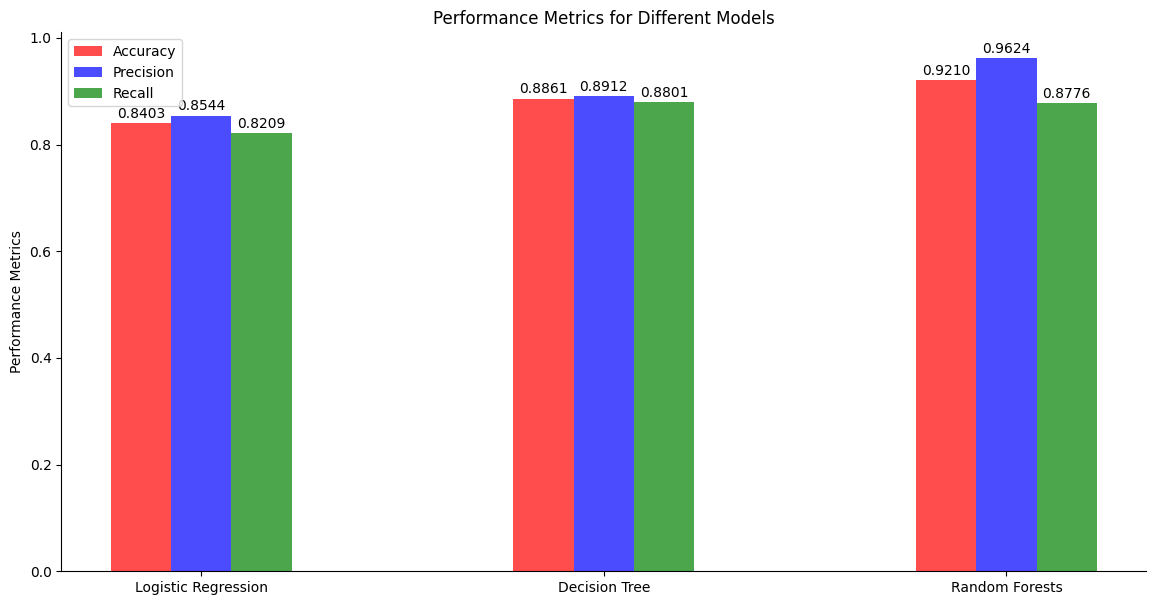

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
models = ['Logistic Regression', 'Decision Tree', 'Random Forests']
accuracy_values = [accuracy_logit, accuracy_dtree, accuracy_rm]
precision_values = [precision_logit, precision_dtree, precision_rm]
recall_values = [recall_logit, recall_dtree, recall_rm]

# Plot settings
plt.figure(figsize=(14, 7))
ax = plt.subplot(111)

# Bar positions
x_pos = np.arange(len(models))

# Plot Accuracy
plt.bar(x_pos, accuracy_values, width=0.15, alpha=0.7, color='red', label='Accuracy')
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=10)

# Plot Precision
plt.bar(x_pos + 0.15, precision_values, width=0.15, alpha=0.7, color='blue', label='Precision')
for i, v in enumerate(precision_values):
    plt.text(i + 0.15, v + 0.01, f"{v:.4f}", ha='center', fontsize=10)

# Plot Recall
plt.bar(x_pos + 0.3, recall_values, width=0.15, alpha=0.7, color='green', label='Recall')
for i, v in enumerate(recall_values):
    plt.text(i + 0.3, v + 0.01, f"{v:.4f}", ha='center', fontsize=10)

# X-axis and labels
plt.xticks(x_pos + 0.15, models)
plt.ylabel('Performance Metrics')
plt.title('Performance Metrics for Different Models')
plt.legend()

# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Show plot
plt.show()
